<a href="https://colab.research.google.com/github/GabEscom/ESCENCIA_CLIENTE_ALURA/blob/main/Escencia_del_cliente_Gab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color = cyan> **Revelando la escencia del cliente**

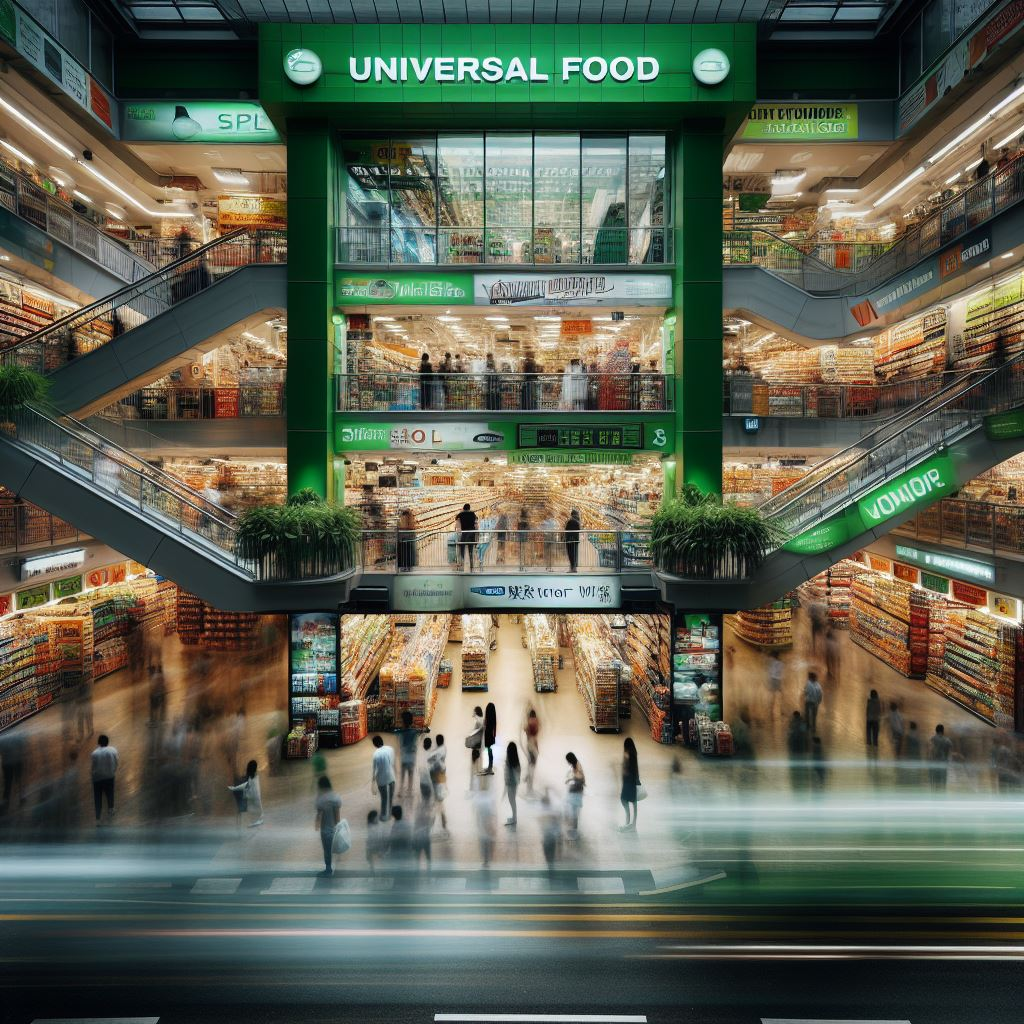

La junta directiva de la cadena de supermercados Universal Food ha observado una estabilización en sus ventas y busca comprender cómo mejorar la relación con sus clientes, entendiendo sus hábitos de compra, para ofrecerles un servicio de mayor calidad. El objetivo es proporcionarles una experiencia de compra más personalizada, rápida y efectiva.

Para abordar este desafí se llevaran acabo las siguientes tareas:

1. Configuración del ambiente

2. Obtención y transformación de datos

3. Exploración de los datos

4. Preprocesamiento y obtención de features

5. Validación de los clusters

6. Análisis e interpretación de los clusters


# <font color = orange> **1. Configuración del ambiente**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import sklearn
import sys

print(f'numpy --> {np.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'seaborn --> {sns.__version__}')
print(f'matplotlib --> {matplotlib.__version__}')
print(f'sklearn --> {sklearn.__version__}')

numpy --> 1.23.5
pandas --> 1.5.3
seaborn --> 0.13.1
matplotlib --> 3.7.1
sklearn --> 1.2.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color = orange> **2. Obtención y transformación de los datos**

> <font color = orange> 2.1 Obtención del dataset inicial

In [3]:
datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura - Botcamp/Challenge 3 La Escencia del Cliente/media prediction and its cost.csv')
columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox).1',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}
# Renombrando las columnas del DataFrame
pd.set_option('display.max_columns', None)
datos.rename(columns=columnas, inplace=True)
datos.drop(columns='promedio_autos(aprox).1', axis=1, inplace=True)
datos.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [4]:
# Agrega la carpeta del archivo .py a sys.path
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Alura - Botcamp/Challenge 3 La Escencia del Cliente/')

# Importa el archivo .py con los diccionarios

from diccionarios import categoria_alimento, departamento, tipo, promocion, escolaridad, miembro, ocupacion, pais, estado_civil, genero, vivienda_propia, ingreso_anual, comercio, divulgacion

datos['categoria_alimento'] = datos['categoria_alimento'].replace(categoria_alimento)
datos['departamento'] = datos['departamento'].replace(departamento)
datos['tipo'] = datos['tipo'].replace(tipo)
datos['promocion'] = datos['promocion'].replace(promocion)
datos['escolaridad'] = datos['escolaridad'].replace(escolaridad)
datos['miembro'] = datos['miembro'].replace(miembro)
datos['ocupacion'] = datos['ocupacion'].replace(ocupacion)
datos['pais'] = datos['pais'].replace(pais)
datos['estado_civil'] = datos['estado_civil'].replace(estado_civil)
datos['genero'] = datos['genero'].replace(genero)
datos['vivienda_propia'] = datos['vivienda_propia'].replace(vivienda_propia)
datos['ingreso_anual'] = datos['ingreso_anual'].replace(ingreso_anual)
datos['comercio'] = datos['comercio'].replace(comercio)
datos['divulgacion'] = datos['divulgacion'].replace(divulgacion)

#Guardando el archivo en formato csv

datos.to_csv('/content/drive/MyDrive/Colab Notebooks/Alura - Botcamp/Challenge 3 La Escencia del Cliente/esencia_cliente.csv', index=False)

datos.head()


,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,Normal,Técnico,Sí,1.0,20000,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4.0,60000,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,Normal,Obrero,No,1.0,20000,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,2.0,40000,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,2.0,40000,0.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


# <font color = orange> **3. Exploración de datos**

Después de realizar la traducción de las columnas categoricas. en esta sección nos familiarizaremos con las los datos de las columnas numpericas. Conoceremos si faltan datos, su distribución, si existe una relación entre los atributos que nos permita reducir el número de columnas para optimizar la implementación del mnodelo de clusterización.

In [5]:
# Conozcamos el df de manera general con la función .info
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

In [6]:
# Corroboramos que no falten datos
datos.isna().sum()

categoria_alimento               0
departamento                     0
tipo                             0
ventas_tienda(en millones)       0
costo_tienda(en millones)        0
ventas_unitarias(en millones)    0
promocion                        0
pais                             0
estado_civil                     0
genero                           0
total_de_hijos                   0
escolaridad                      0
miembro                          0
ocupacion                        0
vivienda_propia                  0
promedio_autos(aprox)            0
ingreso_anual                    0
numero_hijos                     0
marca                            0
precio_recomendado               0
peso_bruto                       0
peso_neto                        0
empaque_reciclable               0
bajo_en_grasa                    0
unidades_por_caja                0
comercio                         0
ciudad                           0
estado                           0
pies_cuadrados_tiend

NOTA: Dado que no hay datos faltantes no es necesario realizar un tratamiento especial para abordar este problema.

## 3.1 Matriz de correlación
En esta sección crearemos una matriz de correlación para conocer la relación que las dimenciones de los datos guardan entre sí y que nos permitirá reducir el número de dimenciones para optimizar la implementación de modelo de clusterización

<ipython-input-7-19add5409e4b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(datos.corr(), dtype=np.bool)
<ipython-input-7-19add5409e4b>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(datos.corr(), dtype=np.bool)
<ipython-input-7-19add5409e4b>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this 

Text(0.5, 1.0, 'Correlación de atributos')

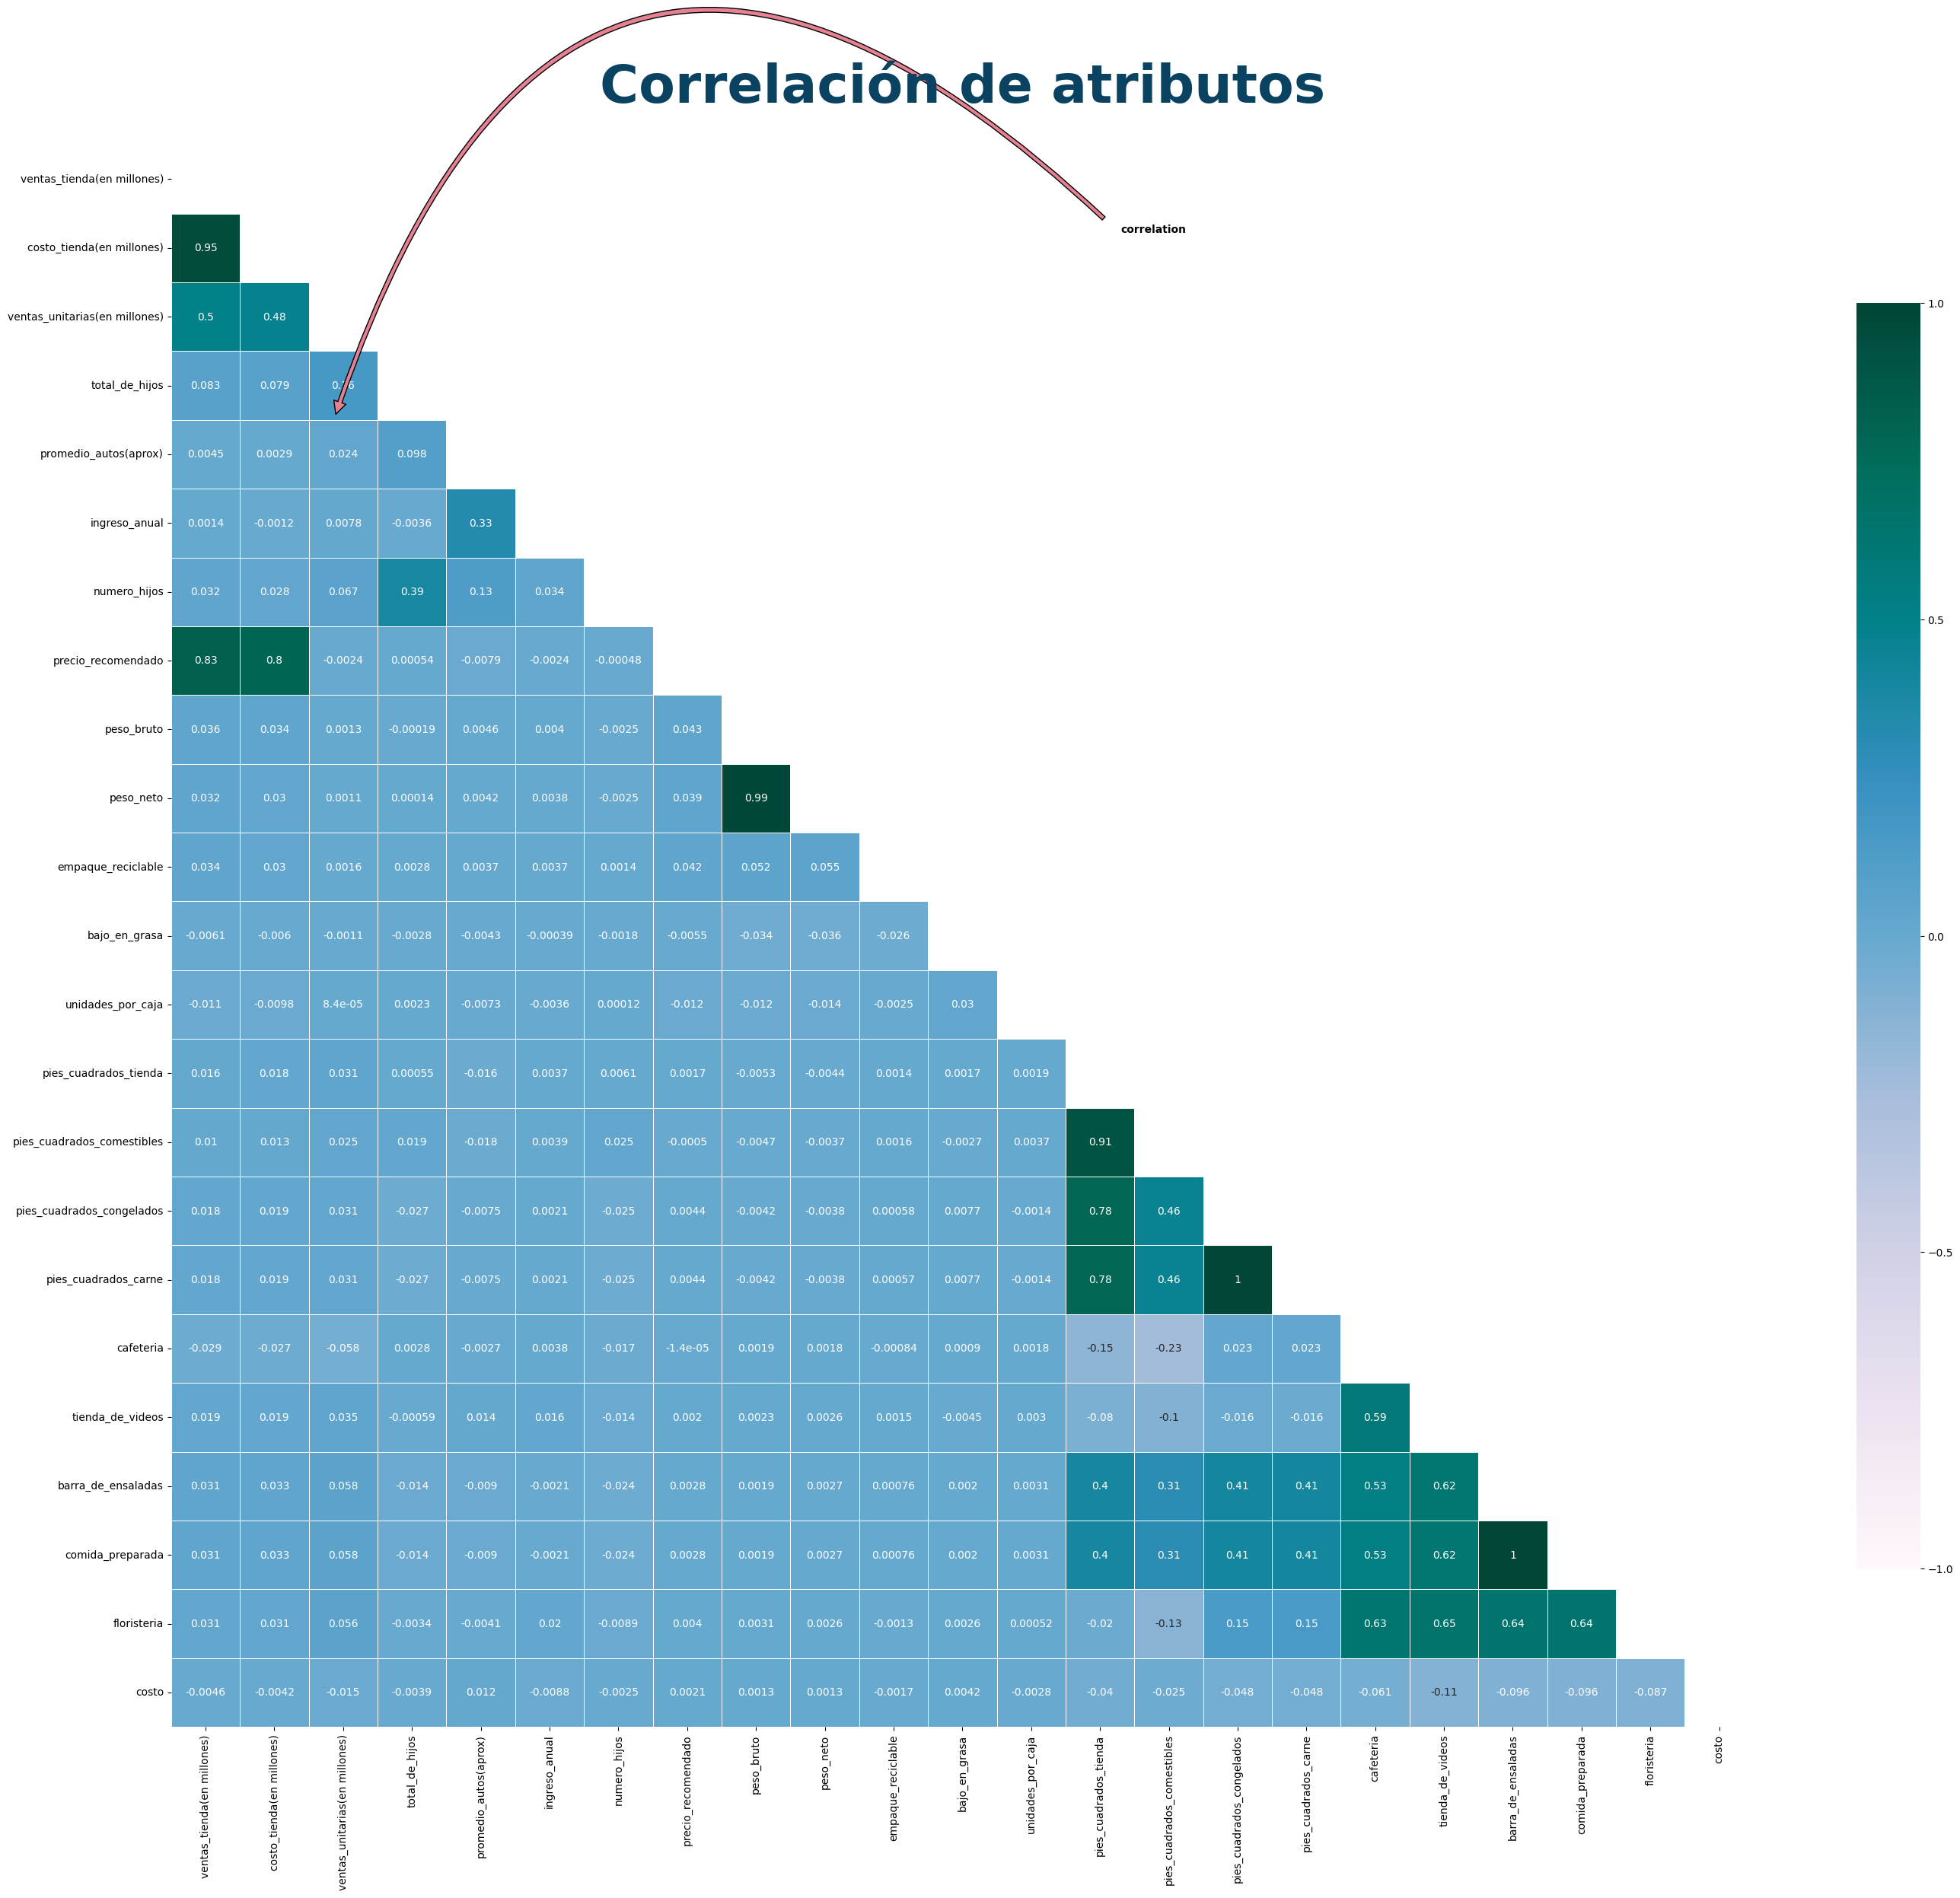

In [7]:
import matplotlib.pyplot as plt
theme = ["#DEF5E5", "#459E97", "#4B9ABB", "#0A4361", "#E68193"]
mask = np.zeros_like(datos.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True


fig, ax = plt.subplots(figsize=(35, 27))

heatmap = sns.heatmap(datos.corr(),
                      mask = mask,
                      square = True,
                      linewidths = .7,
                      cmap = 'PuBuGn',
                      cbar_kws = {'shrink': .8,"ticks" : [-1, -0.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})

# Agregar las columnas del df a los ejes
ax.set_yticklabels(datos.corr(), rotation = 0)
ax.set_xticklabels(datos.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

ax.annotate('correlation',
                    fontsize=10,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Correlación de atributos', size = 50, color = theme[3], weight='bold', pad=40)

NOTA: Creamos un nuevo dataframen sin las columnas que tienen un nivel de correlación cercano o igual a 1

In [8]:
datos.drop(columns=['barra_de_ensaladas', 'pies_cuadrados_carne', 'pies_cuadrados_comestibles', 'peso_neto'], axis=1, inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

## 3.2 Matriz de distribución de datos.
Crearemos tambien una matriz de graficos de distribución de datos para todos los atributos numéricos

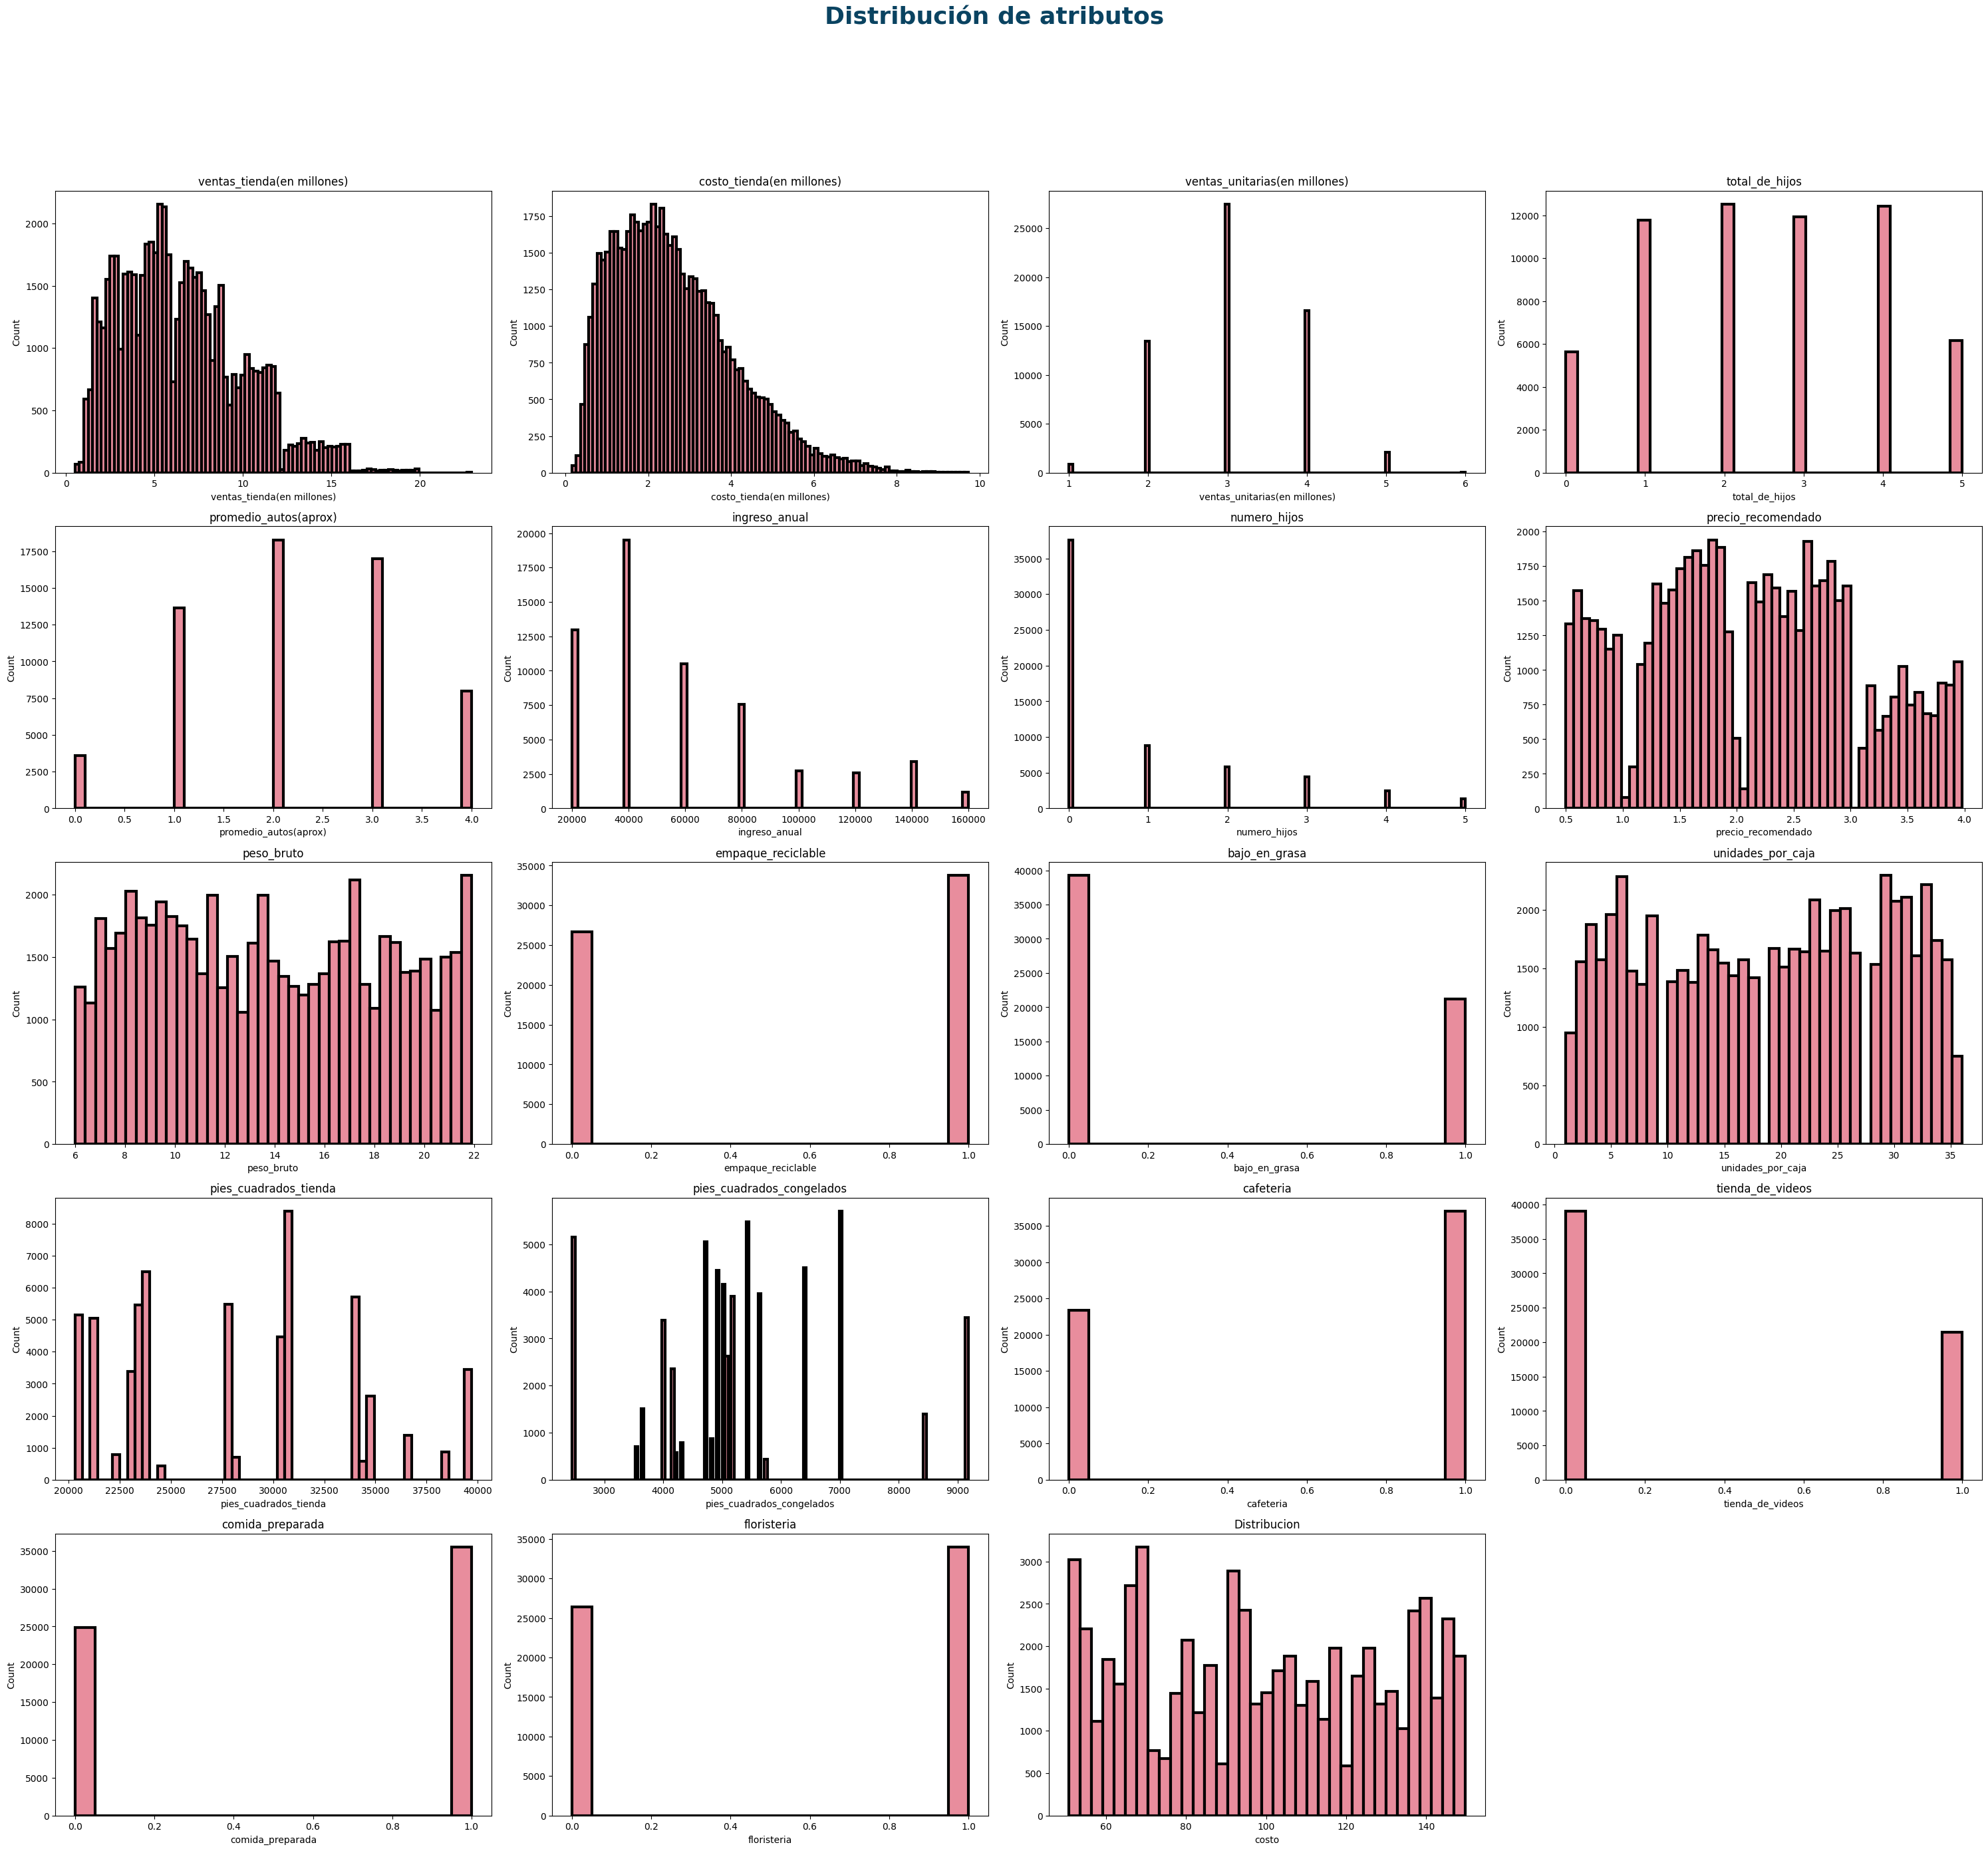

In [9]:
#Creamos un df solo de datos numéricos
columnas_num = datos.select_dtypes(exclude=["object"])
plt.figure(figsize = (30,30))


for ax, col in enumerate(columnas_num.columns[:25]):
    plt.subplot(6,4, ax + 1)
    plt.title(col)
    plotting = sns.histplot(data = columnas_num[col], fill=True, common_norm=False, color="#E68193", alpha=.9, linewidth=3);

plt.tight_layout()
plt.title('Distribucion')
plotting.figure.suptitle('Distribución de atributos',y=1.08, size = 26, color = theme[3], weight='bold');

**NOTA:** Si bien axiste una gran cantidad de columnas numericas, la distribución de valores nos muestra que muchas de estas columnas están actuando como columnas categoricas con una distribución bien definida que agrupa los datos. Por ejemplo las columnas 'ventas_unitarias(en millones)', 'ingreso_anual' con datos que pueden dividirse en 6 o más categorías y otras de solo dos categorías como 'enpaque_reciclable','bajo_en_grasa' entre otras con valores agrupados en dos categorias (0-1). Nos enfocaremos en la distribución den las columnas con una mayor diversidad de valores.

<Figure size 800x600 with 0 Axes>

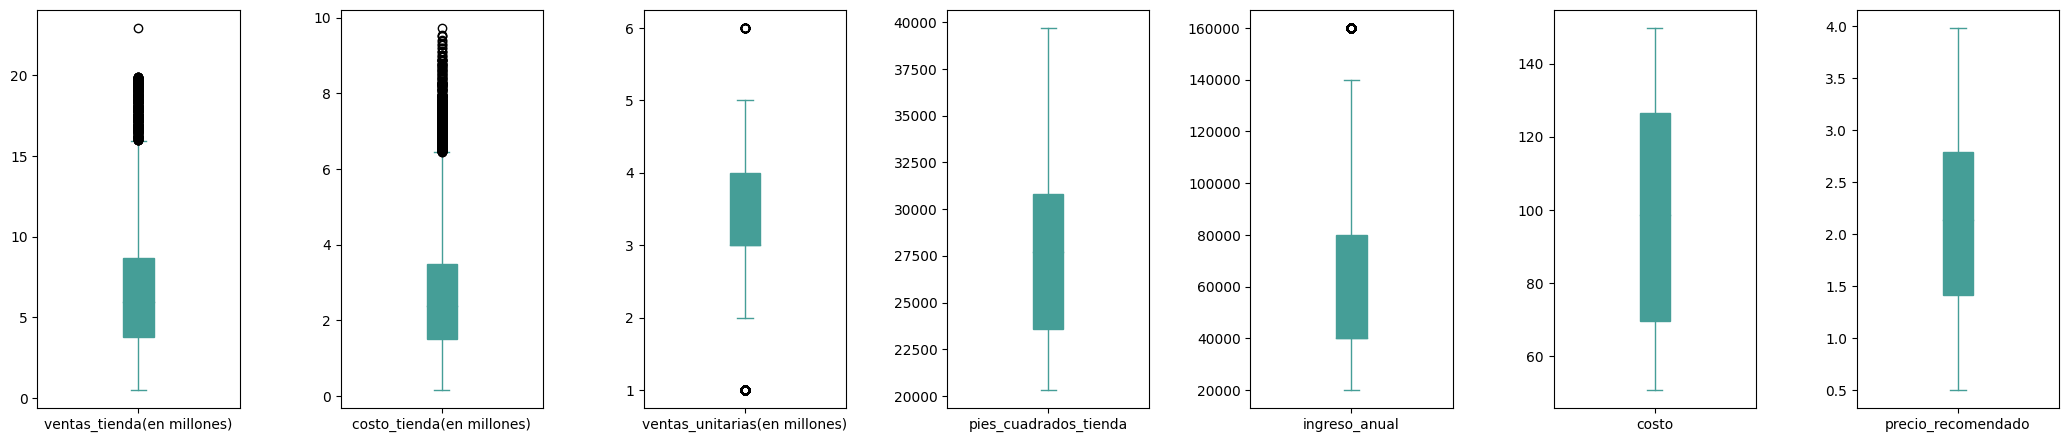

In [10]:
# Crearemos un grafico de boxplot para conocer los outliers de las columnas con una mayor diversidad en sus valores, por ejemplo 'ventas_tienda(en millones)'y'costo_tienda(en millones)'

import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
columnas_num=datos[['ventas_tienda(en millones)','costo_tienda(en millones)', 'ventas_unitarias(en millones)', 'pies_cuadrados_tienda', 'ingreso_anual', 'costo', 'precio_recomendado']]
columnas_num.plot(subplots =True, kind = 'box', layout = (5,8), figsize = (30,30),patch_artist=True,color="#459E97")
plt.subplots_adjust(wspace = 0.5)
plt.style.use("ggplot")
plt.show()

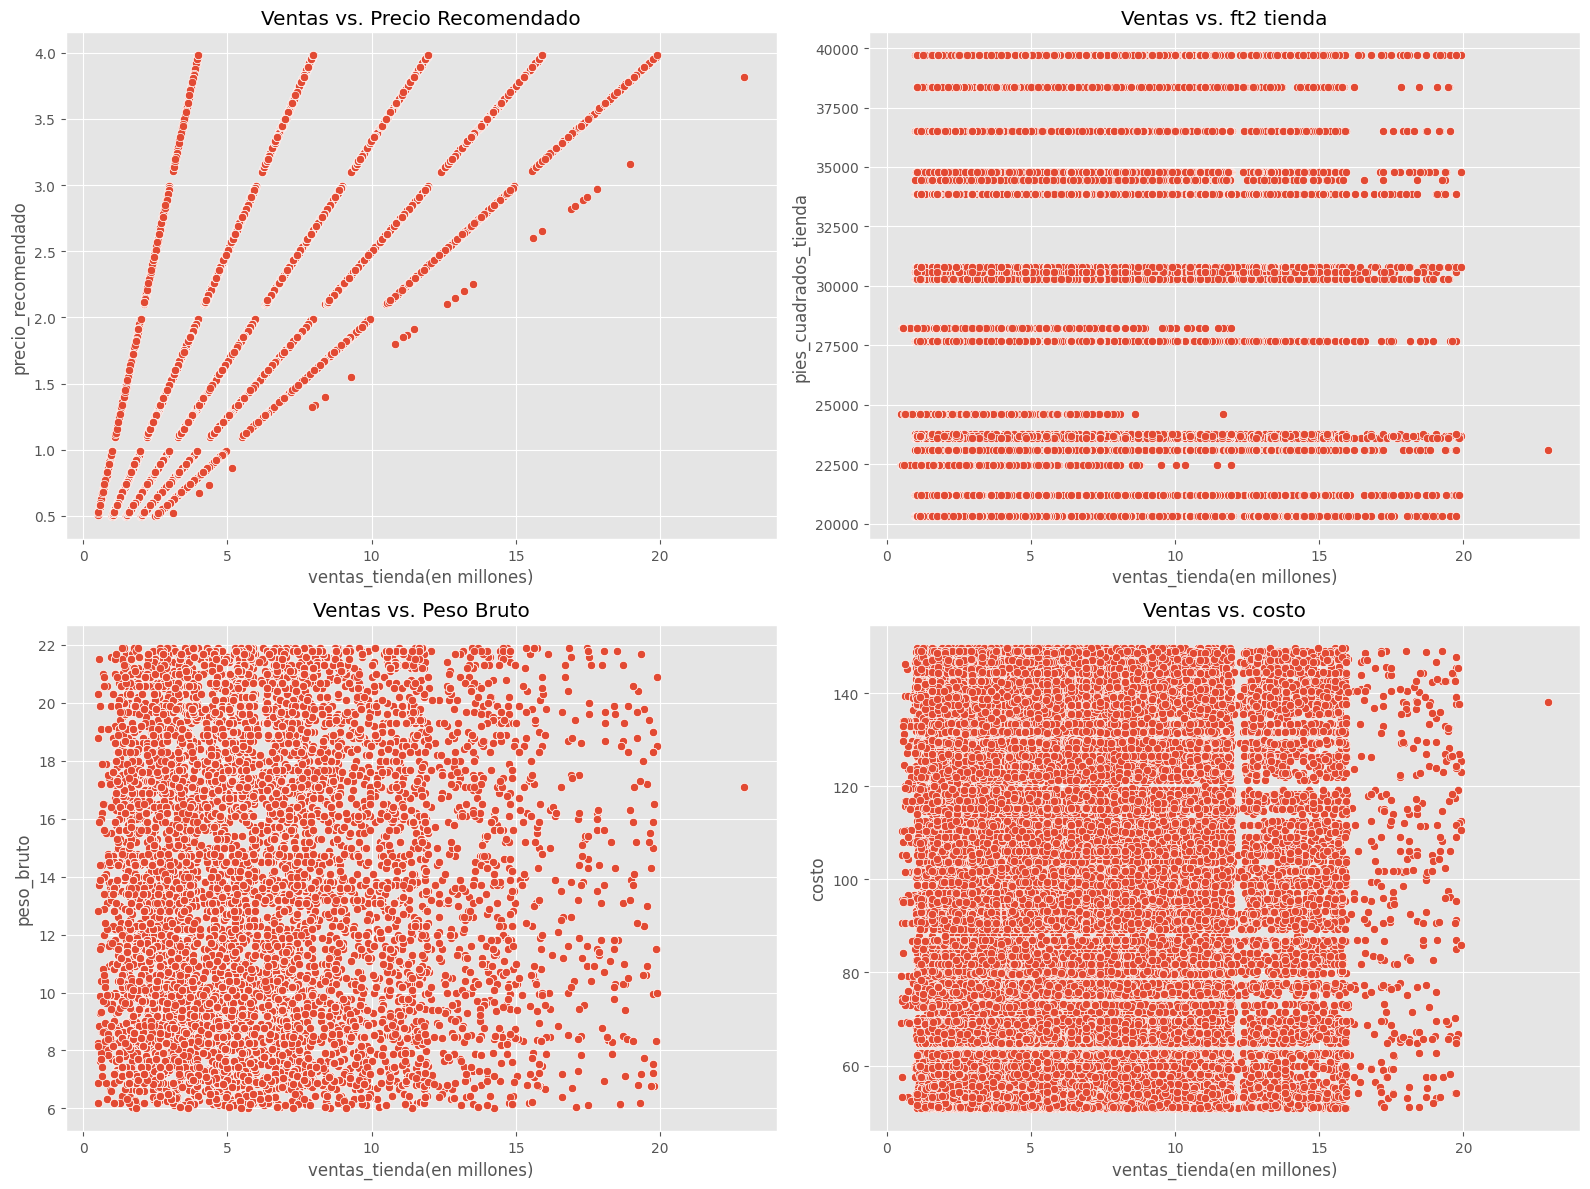

In [11]:
# Fnalmente utilizarems una función que nos permita crear una serie de gr'a'ficos de dispersión para conocer la relación entre los valores de la columna 'ventas_tienda(en millones),

def scatter_plots(df, column_pairs, hue=None):
    plt.figure(figsize=(16, 12))

    for i, (pair_name, pair) in enumerate(column_pairs.items(), start=1):
        plt.subplot(2, 2, i)
        sns.scatterplot(x=pair[0], y=pair[1], hue=hue, data=df)
        plt.title(pair_name)
        plt.xlabel(pair[0])
        plt.ylabel(pair[1])

    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
columnas_para_comparar = {
    'Ventas vs. Precio Recomendado': ['ventas_tienda(en millones)', 'precio_recomendado'],
    'Ventas vs. ft2 tienda': ['ventas_tienda(en millones)', 'pies_cuadrados_tienda'],
    'Ventas vs. Peso Bruto': ['ventas_tienda(en millones)', 'peso_bruto'],
    'Ventas vs. costo': ['ventas_tienda(en millones)', 'costo']
}

scatter_plots(datos, columnas_para_comparar)

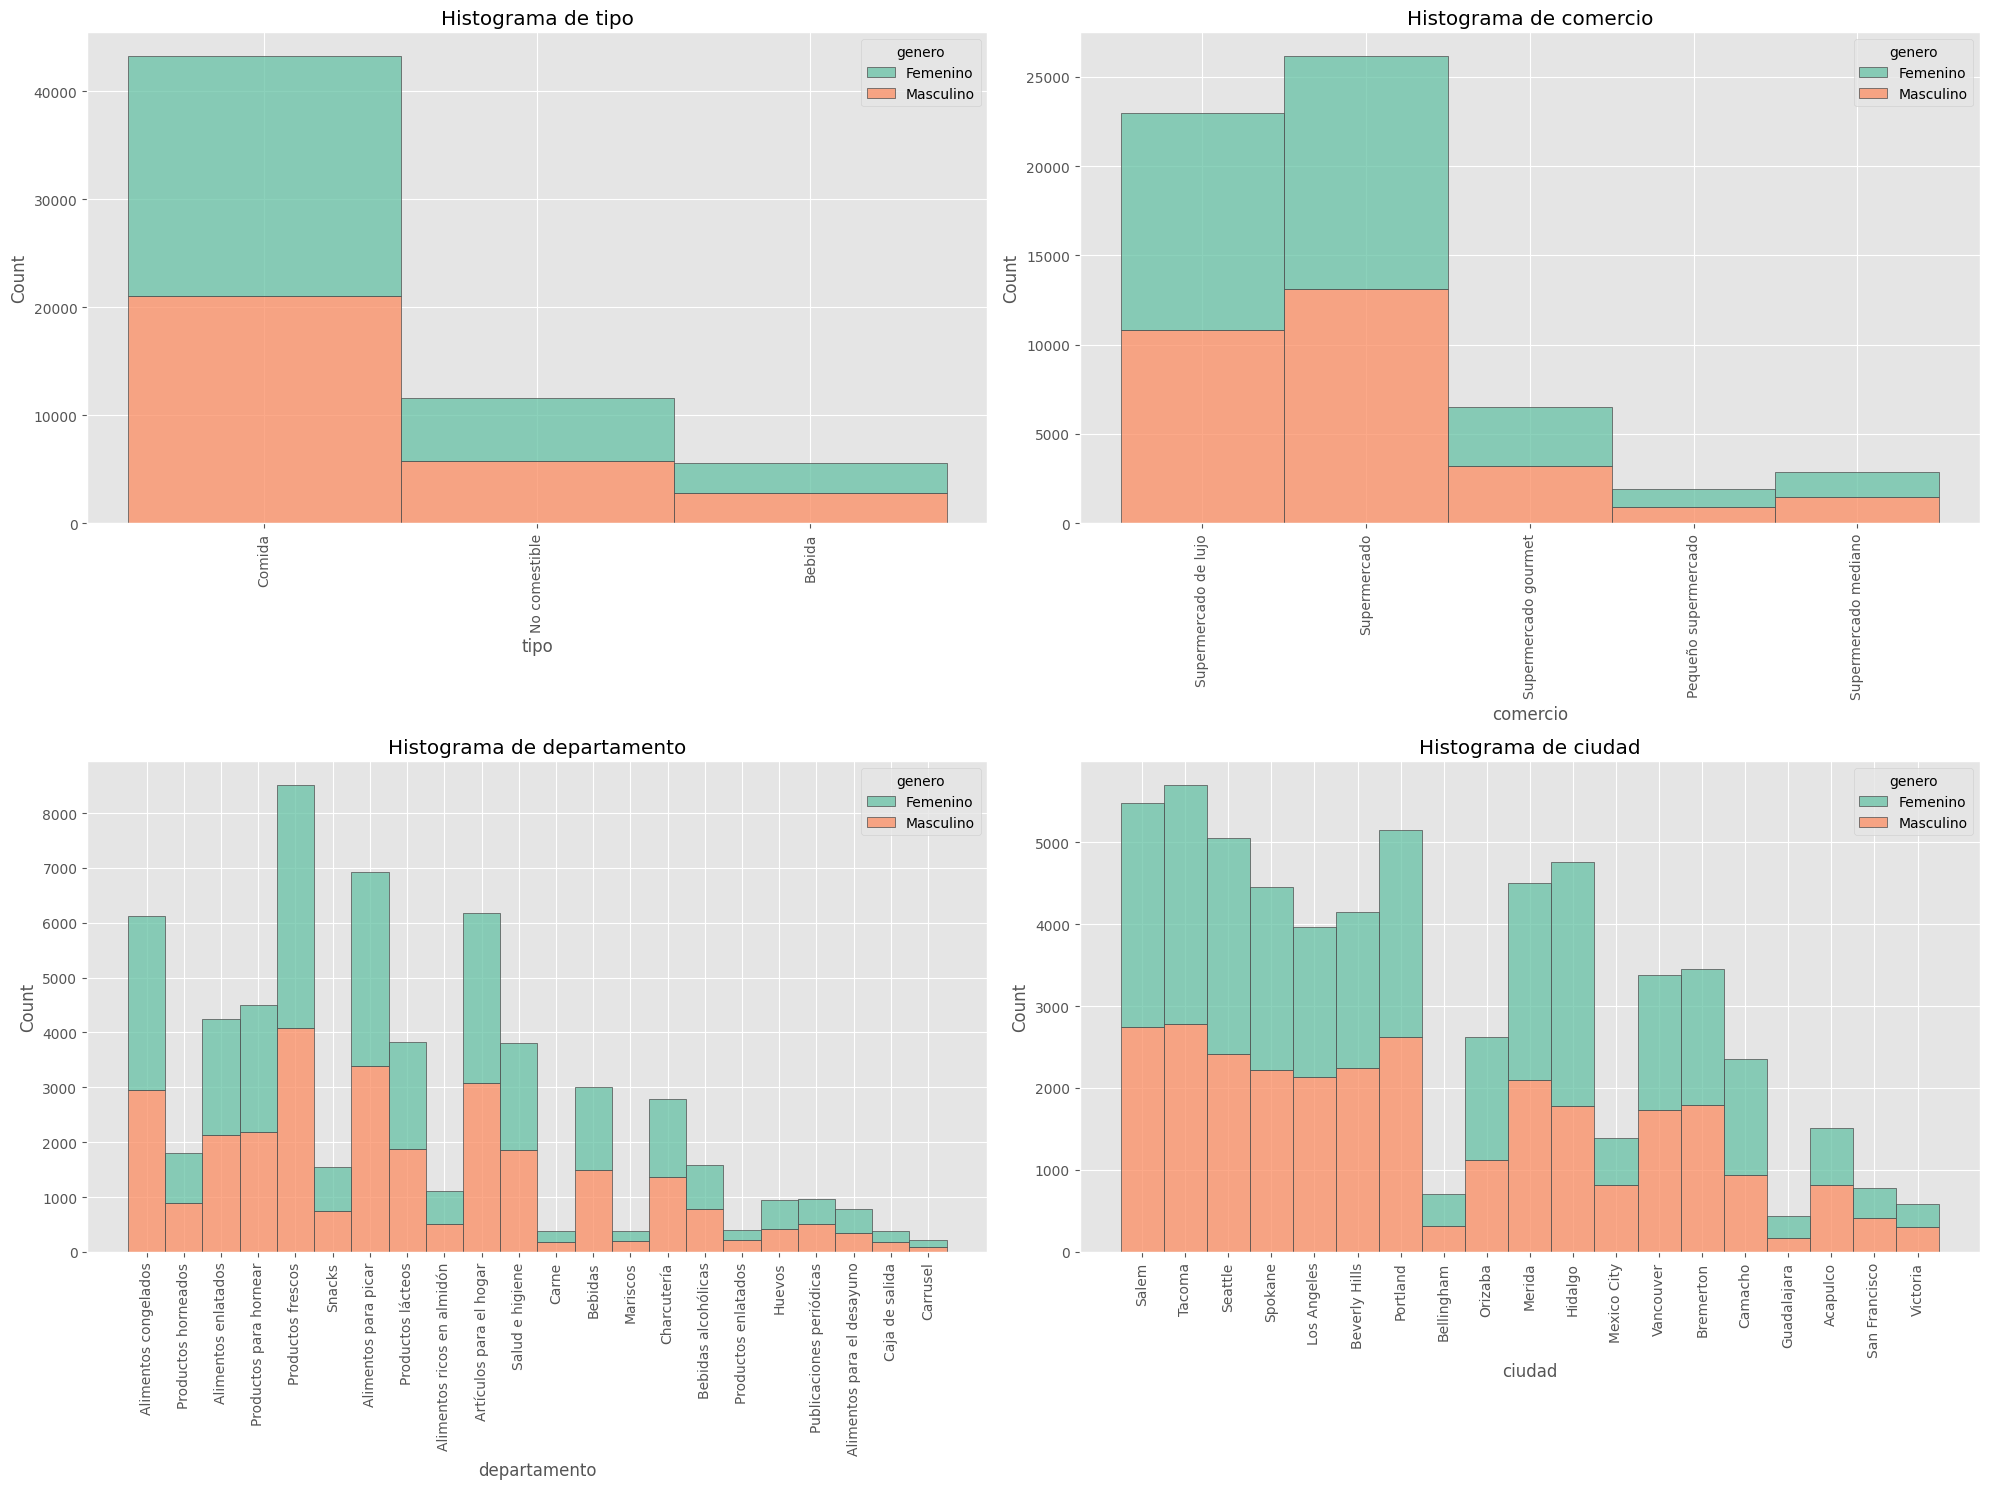

In [12]:
def generar_histogramas_cuadrantes(df, col1, col2, col3=None, col4=None, hue=None):
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))

    # Primer cuadrante
    sns.histplot(data=df, x=col1, hue=hue, multiple="stack", palette="Set2", edgecolor=".3", ax=axes[0, 0])
    axes[0, 0].set_title(f'Histograma de {col1}')
    axes[0, 0].tick_params(axis='x', labelrotation=90)

    # Segundo cuadrante
    sns.histplot(data=df, x=col2, hue=hue, multiple="stack", palette="Set2", edgecolor=".3", ax=axes[0, 1])
    axes[0, 1].set_title(f'Histograma de {col2}')
    axes[0, 1].tick_params(axis='x', labelrotation=90)

    # Tercer cuadrante
    if col3:
        sns.histplot(data=df, x=col3, hue=hue, multiple="stack", palette="Set2", edgecolor=".3", ax=axes[1, 0])
        axes[1, 0].set_title(f'Histograma de {col3}')
        axes[1, 0].tick_params(axis='x', labelrotation=90)

    # Cuarto cuadrante
    if col4:
        sns.histplot(data=df, x=col4, hue=hue, multiple="stack", palette="Set2", edgecolor=".3", ax=axes[1, 1])
        axes[1, 1].set_title(f'Histograma de {col4}')
        axes[1, 1].tick_params(axis='x', labelrotation=90)

    plt.tight_layout()
    plt.show()

# con la opción de hue en cada gráfico
generar_histogramas_cuadrantes(datos, 'tipo', 'comercio', 'departamento', 'ciudad',
                               hue='genero')

<ipython-input-13-5684220284c7>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x=variable_agrupada, y='ventas_tienda(en millones)', hue=variable_leyenda, marker='o', ci=None)
<ipython-input-13-5684220284c7>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x=variable_agrupada, y='ventas_unitarias(en millones)', hue=variable_leyenda, marker='o', ci=None)


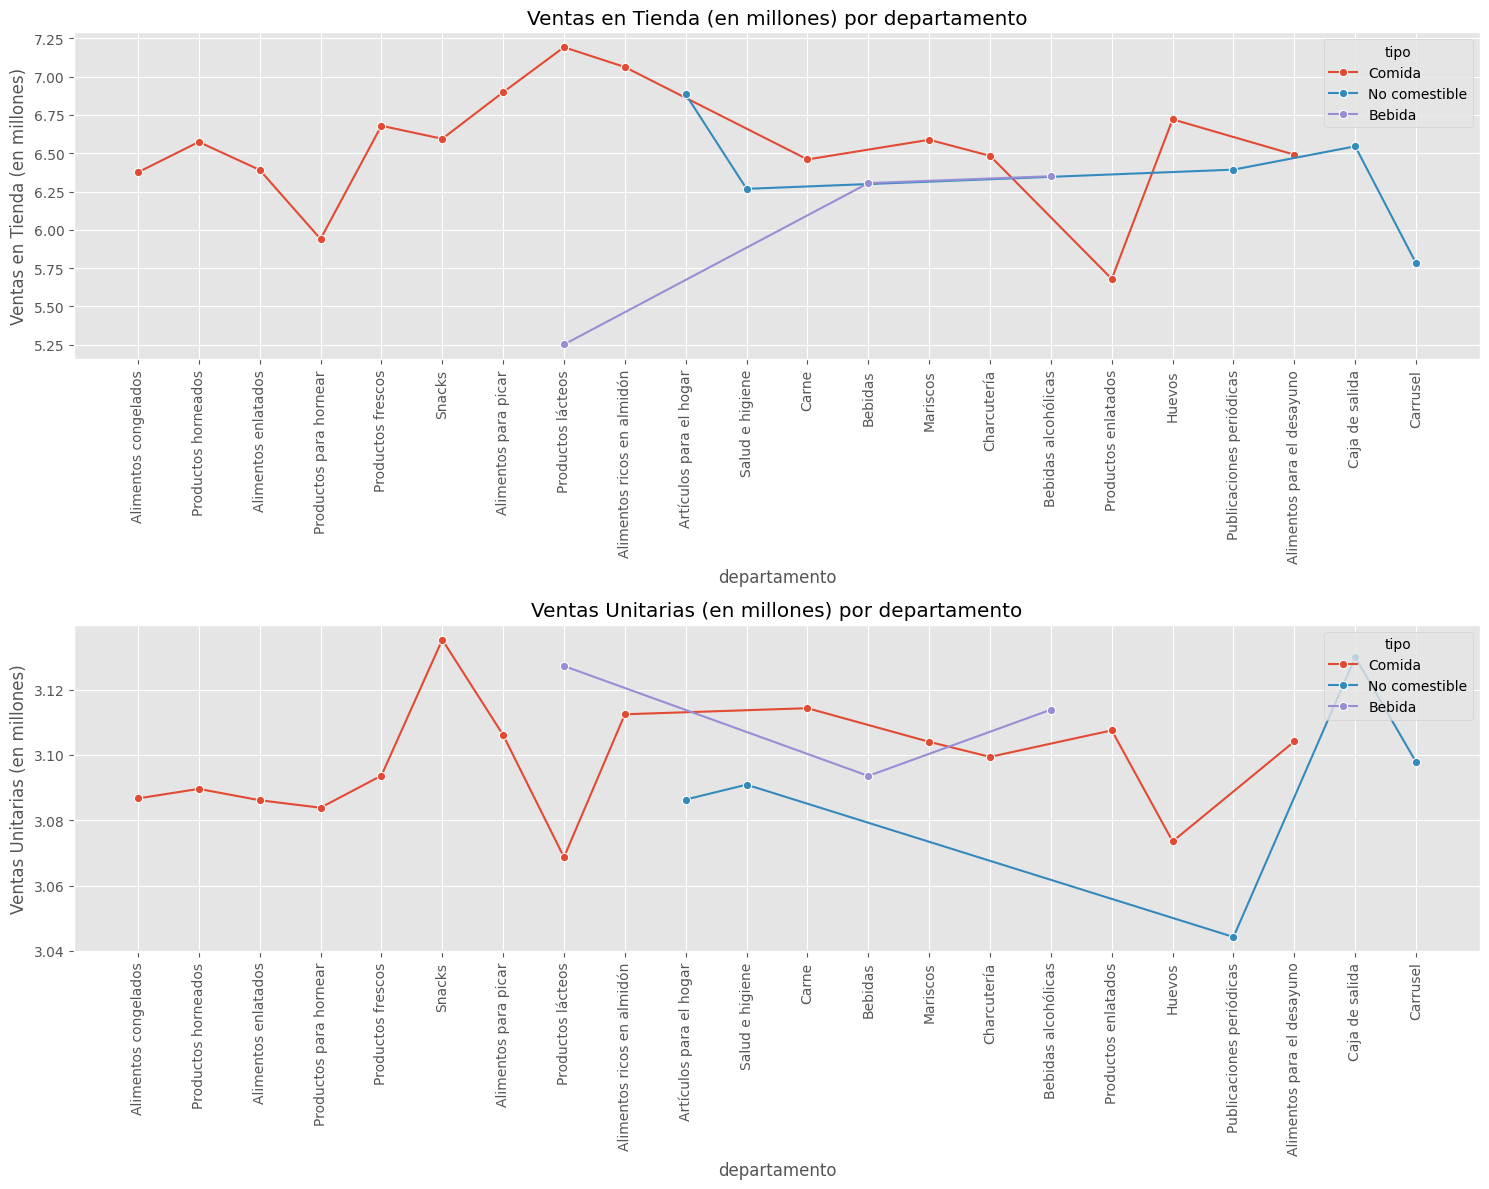

In [13]:
def generar_graficos_ventas(df, variable_agrupada, variable_leyenda):
    plt.figure(figsize=(15, 12))

    # Gráfico para ventas_tienda(en millones)
    plt.subplot(2, 1, 1)
    sns.lineplot(data=df, x=variable_agrupada, y='ventas_tienda(en millones)', hue=variable_leyenda, marker='o', ci=None)
    plt.title('Ventas en Tienda (en millones) por ' + variable_agrupada)
    plt.xlabel(variable_agrupada)
    plt.ylabel('Ventas en Tienda (en millones)')
    plt.legend(title=variable_leyenda, loc='upper right')
    plt.xticks(rotation=90)  # Añadido para rotar los ticks

    # Gráfico para ventas_unitarias(en millones)
    plt.subplot(2, 1, 2)
    sns.lineplot(data=df, x=variable_agrupada, y='ventas_unitarias(en millones)', hue=variable_leyenda, marker='o', ci=None)
    plt.title('Ventas Unitarias (en millones) por ' + variable_agrupada)
    plt.xlabel(variable_agrupada)
    plt.ylabel('Ventas Unitarias (en millones)')
    plt.legend(title=variable_leyenda, loc='upper right')
    plt.xticks(rotation=90)  # Añadido para rotar los ticks

    plt.tight_layout()
    plt.show();

# Ejemplo de uso con el DataFrame 'datos', agrupando por 'categoria_alimento' y usando 'pais' como leyenda
generar_graficos_ventas(datos, 'departamento', 'tipo')

# <font color = orange> **4. Procesamiento y obtención de Features**

Para realizar la selección de features para la clusterización, transformaremos nuestro data frame mediante la codificación numérica de las columnas categóricas y también mediante el uso de la función get.dummies()

## 4.1 Preprocesamiento

In [14]:
# Utilizamos una función para conocer todos los valores unicos de cada columna categórica
def imprimir_valores_unicos(df):
    columnas_no_numericas = df.select_dtypes(exclude=['number']).columns

    for columna in columnas_no_numericas:
        print(f"Nombre columna: {columna}")
        print("Valores únicos:")
        valores_unicos = df[columna].unique()
        for valor in valores_unicos:
            print(valor)
        print("-----------")

# Ejemplo de uso con el DataFrame 'datos'
imprimir_valores_unicos(datos)


Nombre columna: categoria_alimento
Valores únicos:
Alimentos para el desayuno
Pan
Camarones enlatados
Productos para hornear
Vegetales
Postres congelados
Dulces
Alimentos para picar
Productos lácteos
Alimentos ricos en almidón
Suministros de limpieza
Descongestionantes
Carne
Bebidas calientes
Mermeladas y jaleas
Bebidas carbonatadas
Mariscos
Especialidades
Productos de cocina
Eléctrico
Cerveza y vino
Velas
Fruta
Bebidas de jugo puro
Sopa enlatada
Productos de papel
Atún enlatado
Huevos
Artículos de ferretería
Sardinas enlatadas
Almejas enlatadas
Analgésicos
Acompañamientos
Productos de baño
Revistas
Platos preparados congelados
Pizza
Remedios para el resfriado
Anchoas enlatadas
Bebidas
Higiene
Productos de plástico
Ostras enlatadas
Vegetales envasados
Misceláneos
-----------
Nombre columna: departamento
Valores únicos:
Alimentos congelados
Productos horneados
Alimentos enlatados
Productos para hornear
Productos frescos
Snacks
Alimentos para picar
Productos lácteos
Alimentos ricos en al

## 4.2 Codificación de variables

In [15]:
# Creamos una función para la codificación de los valores de las columnas pasando un diccionario con la codificación numerica de cada columna

def codificar_variables_categoricas(df, codificacion_numerica):
    for columna, codificacion in codificacion_numerica.items():
        df[columna] = df[columna].replace(codificacion).astype(float)

    return df

codificacion = {
        'estado_civil': {'Casado': 0, 'Soltero': 1},
        'genero': {'Femenino': 0, 'Masculino': 1},
        'vivienda_propia': {'No': 0, 'Sí': 1},
        'escolaridad':{
        'Primaria':0,
        'Superior':3,
        'Secundaria':1,
        'Maestría':4,
        'Técnico':2
        },
        'categoria_alimento': {
        'Alimentos para el desayuno': 0,
        'Pan': 1,
        'Camarones enlatados': 2,
        'Productos para hornear': 3,
        'Vegetales': 4,
        'Postres congelados': 5,
        'Dulces': 6,
        'Alimentos para picar': 7,
        'Productos lácteos': 8,
        'Alimentos ricos en almidón': 9,
        'Suministros de limpieza': 10,
        'Descongestionantes': 11,
        'Carne': 12,
        'Bebidas calientes': 13,
        'Mermeladas y jaleas': 14,
        'Bebidas carbonatadas': 15,
        'Mariscos': 16,
        'Especialidades': 17,
        'Productos de cocina': 18,
        'Eléctrico': 19,
        'Cerveza y vino': 20,
        'Velas': 21,
        'Fruta': 22,
        'Bebidas de jugo puro': 23,
        'Sopa enlatada': 24,
        'Productos de papel': 25,
        'Atún enlatado': 26,
        'Huevos': 27,
        'Artículos de ferretería': 28,
        'Sardinas enlatadas': 29,
        'Almejas enlatadas': 30,
        'Analgésicos': 31,
        'Acompañamientos': 32,
        'Productos de baño': 33,
        'Revistas': 34,
        'Platos preparados congelados': 35,
        'Pizza': 36,
        'Remedios para el resfriado': 37,
        'Anchoas enlatadas': 38,
        'Bebidas': 39,
        'Higiene': 40,
        'Productos de plástico': 41,
        'Ostras enlatadas': 42,
        'Vegetales envasados': 43,
        'Misceláneos': 44
         },
        'departamento': {
        'Alimentos congelados': 0,
        'Productos horneados': 1,
        'Alimentos enlatados': 2,
        'Productos para hornear': 3,
        'Productos frescos': 4,
        'Snacks': 5,
        'Alimentos para picar': 6,
        'Productos lácteos': 7,
        'Alimentos ricos en almidón': 8,
        'Artículos para el hogar': 9,
        'Salud e higiene': 10,
        'Carne': 11,
        'Bebidas': 12,
        'Mariscos': 13,
        'Charcutería': 14,
        'Bebidas alcohólicas': 15,
        'Productos enlatados': 16,
        'Huevos': 17,
        'Publicaciones periódicas': 18,
        'Alimentos para el desayuno': 19,
        'Caja de salida': 20,
        'Carrusel': 21
        },
        'tipo':{
        'Comida':0,
        'No comestible':1,
        'Bebida':2
        },
        'miembro': {
        'Normal': 0,
        'Bronce': 1,
        'Plata': 2,
        'Oro': 3
        },
        'ocupacion': {
        'Técnico': 0,
        'Profesional': 1,
        'Obrero': 2,
        'Gestión': 3,
        'Cargo de Oficina': 4
         },
        'pais':{
        'México':2,
        'Canadá':1,
        'Estados Unidos':0
        },
        'comercio':{
        'Supermercado de lujo':3,
        'Supermercado':1,
        'Supermercado gourmet':4,
        'Pequeño supermercado':0,
        'Supermercado mediano':2},
}

datos_cod=datos.copy()
# Llama a la función para codificar las variables categóricas en el DataFrame 'datos'
codificar_variables_categoricas(datos_cod, codificacion)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_congelados,cafeteria,tienda_de_videos,comida_preparada,floristeria,divulgacion,costo
0,0.0,0.0,0.0,7.36,2.7232,4.0,Bolsas llenas,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,20000,1.0,Carrington,1.84,19.70,1.0,0.0,17.0,3.0,Salem,OR,27694.0,5415.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,0.0,0.0,0.0,5.52,2.5944,3.0,Lotería de la caja registradora,0.0,0.0,1.0,0.0,3.0,2.0,1.0,1.0,4.0,60000,0.0,Carrington,1.84,19.70,1.0,0.0,17.0,3.0,Salem,OR,27694.0,5415.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,0.0,0.0,0.0,3.68,1.3616,2.0,Ahorro para apostadores grandes,0.0,1.0,0.0,4.0,0.0,0.0,2.0,0.0,1.0,20000,0.0,Carrington,1.84,19.70,1.0,0.0,17.0,3.0,Salem,OR,27694.0,5415.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,0.0,0.0,0.0,3.68,1.1776,2.0,Lotería de la caja registradora,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,40000,2.0,Carrington,1.84,19.70,1.0,0.0,17.0,3.0,Salem,OR,27694.0,5415.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,0.0,0.0,0.0,4.08,1.4280,3.0,Venta Doble,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,40000,0.0,Golden,1.36,7.12,0.0,1.0,29.0,3.0,Salem,OR,27694.0,5415.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,17.0,21.0,1.0,2.76,1.3248,1.0,Días de ahorro,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,20000,1.0,ADJ,2.76,19.60,1.0,0.0,26.0,0.0,San Francisco,CA,22478.0,4294.0,1.0,0.0,0.0,0.0,Cupón en la tienda,95.25
60424,17.0,21.0,1.0,1.60,0.4960,1.0,Rebajando precios,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,2.0,40000,0.0,Symphony,1.60,17.40,1.0,0.0,36.0,0.0,San Francisco,CA,22478.0,4294.0,1.0,0.0,0.0,0.0,Periódico dominical,69.42
60425,17.0,21.0,1.0,5.52,2.5392,2.0,Descuento de fin de semana,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,40000,0.0,ADJ,2.76,19.60,1.0,0.0,26.0,0.0,San Francisco,CA,22478.0,4294.0,1.0,0.0,0.0,0.0,"Periódico dominical, radio, televisión",67.51
60426,17.0,21.0,1.0,8.28,2.5668,3.0,Días de venta,1.0,1.0,1.0,2.0,3.0,1.0,1.0,0.0,4.0,80000,0.0,ADJ,2.76,19.60,1.0,0.0,26.0,2.0,Victoria,BC,34452.0,4193.0,1.0,0.0,0.0,1.0,Periódico dominical,132.88


In [16]:
# Separamos todas las columnas numéricas del df

columnas_num = datos_cod.select_dtypes(exclude=["object"])

# Seleccionamos las columnas categóricas a las que se le aplicará' la funcion get.dummies
columnas_categoricas = ['escolaridad', 'pais', 'ocupacion', 'miembro', 'comercio', 'tipo']

# Creamos un DataFrame con variables dummy
df_dummies = pd.get_dummies(datos[columnas_categoricas])

# Concatena los DataFrames de variables dummy con el DataFrame de columnas numéricas
datos_final = pd.concat([columnas_num, df_dummies], axis=1)

datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  float64
 1   departamento                   60428 non-null  float64
 2   tipo                           60428 non-null  float64
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   pais                           60428 non-null  float64
 7   estado_civil                   60428 non-null  float64
 8   genero                         60428 non-null  float64
 9   total_de_hijos                 60428 non-null  float64
 10  escolaridad                    60428 non-null  float64
 11  miembro                        60428 non-null  float64
 12  ocupacion                      60428 non-null 

## 4.3 Selección de de atributos

In [17]:
datos_final_1=datos_final[['departamento',
                           'ventas_tienda(en millones)',
                           'ingreso_anual',
                           'comercio',
                           'escolaridad_Maestría',
                           'escolaridad_Primaria',
                           'escolaridad_Secundaria',
                           'escolaridad_Superior',
                           'escolaridad_Técnico',
                           'miembro',
                           'ocupacion']]

datos_final_2=datos_final[['departamento',
                           'ventas_tienda(en millones)',
                           'escolaridad',
                           'ocupacion',
                           'ingreso_anual',
                           'comercio',
                           'miembro_Normal',
                           'miembro_Bronce',
                           'miembro_Plata',
                           'miembro_Oro']]

datos_final_3=datos_final[['departamento',
                           'ventas_tienda(en millones)',
                           'escolaridad',
                           'miembro',
                           'ingreso_anual',
                           'comercio',
                           'ocupacion_Cargo de Oficina',
                           'ocupacion_Obrero',
                           'ocupacion_Profesional',
                           'ocupacion_Técnico',
                           'ocupacion_Gestión']]

Finalmente creamos 3 df con los que estaremos iterando la mejor selección de atributos que nos permitira realizar la clusterización de la manera más eficiente monitoreando los resultados de Silhouette, Davies-Bouldin y Calinski-Harabasz

## 4.4 Estandarización
Procederemos a estandarizar nuestros datos para que todas las variables puedan ser tenidas en cuenta dentro de una misma escala.


In [18]:
from sklearn.preprocessing import StandardScaler

# Inicializa el StandardScaler
scaler = StandardScaler()

# Estandariza todos los datos en 'datos_final'
X_std = scaler.fit_transform(datos_final_1)

#X_std = pd.DataFrame(X_std, columns=datos_final_3.columns)

X_std


array([[-1.37252046,  0.23649007, -1.06147109, ..., -0.30955104,
        -1.23393279, -1.23483665],
       [-1.37252046, -0.2948384 ,  0.04675692, ..., -0.30955104,
         0.99615471, -0.30133265],
       [-1.37252046, -0.82616687, -1.06147109, ..., -0.30955104,
        -1.23393279,  0.63217136],
       ...,
       [ 2.85625989, -0.2948384 , -0.50735708, ..., -0.30955104,
        -0.11888904,  0.63217136],
       [ 2.85625989,  0.50215431,  0.60087093, ..., -0.30955104,
        -0.11888904, -0.30133265],
       [ 2.85625989,  0.76781854, -1.06147109, ..., -0.30955104,
        -0.11888904,  0.63217136]])

#<font color = orange> **5. Clusterización y validación**

##5.1 Variación del número de clusters

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics

scores= []

for s in range(3,11):
   score={}
   kmeans = KMeans(n_clusters=s, n_init=10, max_iter= 300, random_state=42)
   y_pred = kmeans.fit_predict(X_std)
   labels = kmeans.labels_
   score['N_Clusters'] = s
   score['Silhouette'] = metrics.silhouette_score(X_std, labels, metric='euclidean')
   score['Davies-Bouldin'] = metrics.davies_bouldin_score(X_std, labels)
   score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(X_std, labels)
   scores.append(score)

table = pd.DataFrame(scores)
table

,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.223945,1.842158,12006.415632
1,4,0.276330,1.521086,12926.547112
2,5,0.319712,1.240463,14687.943767
3,6,0.310333,1.349111,13544.227946
4,7,0.266947,1.620547,12383.156025
5,8,0.236532,1.741413,11602.997669
6,9,0.215900,1.737148,10968.121567
7,10,0.210690,1.731727,10395.546873


Nota:  Dado que los valores de Silhouette, Davies B. y Calinski H. no fueron los esperados para el df 'datos_final_1' y 'datos_final_2', realizamos la clusterización del df 'datos_final_3'.

In [20]:
X_std = StandardScaler().fit_transform(datos_final_3)
scores= []

for s in range(3,11):
   score={}
   kmeans = KMeans(n_clusters=s, n_init=10, max_iter= 300, random_state=42)
   y_pred = kmeans.fit_predict(X_std)
   labels = kmeans.labels_
   score['N_Clusters'] = s
   score['Silhouette'] = metrics.silhouette_score(X_std, labels, metric='euclidean')
   score['Davies-Bouldin'] = metrics.davies_bouldin_score(X_std, labels)
   score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(X_std, labels)
   scores.append(score)

table = pd.DataFrame(scores)
table

,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.277930,1.468520,15940.798349
1,4,0.330621,1.387978,17257.703389
2,5,0.355584,1.102024,19056.341668
3,6,0.311797,1.349148,17105.555855
4,7,0.298999,1.338190,15465.742390
5,8,0.250290,1.501282,14337.109568
6,9,0.227892,1.599041,13781.481881
7,10,0.235709,1.527870,13092.106831


Nota: Los datos no muestran una mejoría significante para alcanzar los valores minimos requeridos así que ahora ulizamos la la normalización como método de preprocesamiento.

In [21]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(datos_final_3)
scores= []

for s in range(3,11):
   score={}
   kmeans = KMeans(n_clusters=s, n_init=10, max_iter= 300, random_state=42)
   y_pred = kmeans.fit_predict(values)
   labels = kmeans.labels_
   score['N_Clusters'] = s
   score['Silhouette'] = metrics.silhouette_score(values, labels, metric='euclidean')
   score['Davies-Bouldin'] = metrics.davies_bouldin_score(values, labels)
   score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(values, labels)
   scores.append(score)

table = pd.DataFrame(scores)
table

,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.435085,1.056225,44425.765232
1,4,0.423138,0.939006,45135.271349
2,5,0.379843,0.960080,43457.541667
3,6,0.347304,0.964944,42331.892680
4,7,0.337431,1.033441,39578.250689
5,8,0.335936,1.004420,38105.563187
6,9,0.273637,1.058102,36398.207248
7,10,0.269285,1.061081,35009.784519


NOTA: Dado que aún no se ha alcando el valor min de Silhouette requerido, ahora realizamos una prueba de clusterización sin preprocesamiento con el df 'datos_final_3' que en principio fue el que mejores valores de Silhouette mostró.

In [22]:
values = datos_final_3
scores= []

for s in range(3,11):
   score={}
   kmeans = KMeans(n_clusters=s, n_init=10, max_iter= 300, random_state=42)
   y_pred = kmeans.fit_predict(values)
   labels = kmeans.labels_
   score['N_Clusters'] = s
   score['Silhouette'] = metrics.silhouette_score(values, labels, metric='euclidean')
   score['Davies-Bouldin'] = metrics.davies_bouldin_score(values, labels)
   score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(values, labels)
   scores.append(score)

table = pd.DataFrame(scores)
table

,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.697547,0.493429,2.448590e+05
1,4,0.722143,0.400492,3.014342e+05
2,5,0.911025,0.273183,5.251390e+05
3,6,0.944724,0.298002,1.065070e+06
4,7,0.977831,0.159842,2.249244e+06
5,8,0.999597,0.000583,2.815764e+11
6,9,0.797655,0.237360,2.856639e+11
7,10,0.663735,0.422078,2.836084e+11


NOTA: Después de obtener el valor de Silhouette, Davies-Bouldin y Calinski-Harabasz para los 3 df propuestos, el que mejores metricas arrojó fue le df no 3 'datos_final_3'. Sin embargo no se obtuvieron los valores de Silhouette mínimos requeridos para ninguna instancia de n de clusters.
También se intento realizar la clusterización mediante una normalización, en lugar de la estandarización y se obtuvieron mejores resultados aunque ninguna instancia del número de clusters superó el valor de Silhouette > 0.5.
Curiosamente los resultados con no. de Silhouette mayores a 0.5 se obtuvieron los los valores del df sin estandarizar.
Siguiendo las indicaciones en Trello obre como abordar el problema se utilizó la estandarización como método de procesamento y se seleccionó el df 'datos_finla_3' para la clusterización.

## 5.2 Evaluzación de la estructura de los clusters

In [23]:
import numpy as np

random_data = np.random.rand(60428,11)
scores= []

for s in range(3,11):
  score={}
  kmeans = KMeans(n_clusters= s, n_init=10, max_iter= 300, random_state=42)
  y_pred = kmeans.fit_predict(random_data)
  labels = kmeans.labels_
  score['N_Clusters'] = s
  score['Silhouette'] = metrics.silhouette_score(random_data, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(random_data, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(random_data, labels)
  scores.append(score)

random_table = pd.DataFrame(scores)
random_table

,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.058007,3.272333,3750.874088
1,4,0.058489,3.179758,3378.656414
2,5,0.057213,2.867670,3048.673425
3,6,0.057721,2.711959,2839.541371
4,7,0.058186,2.575463,2666.910877
5,8,0.059653,2.448300,2532.594554
6,9,0.059044,2.376047,2404.483416
7,10,0.059761,2.291937,2307.311643


NOTA: Se evaluó la estructura de los clusters tomando como referencia una baseline. Para generar la baseline se generó un array de números aleatorios con el módulo random de numpy con las mismas dimensiones del dataset (datos_final_3). Las metricas del df X_nor obtuvieron puntajes más altos al df random_data.

## 5.3 Evaluación de la estabilidad de los clusters

In [24]:
X_std = StandardScaler().fit_transform(datos_final_3)
set1,set2,set3 = np.array_split(X_std,3)
sets = [set1,set2,set3]

scores= []

for set_ in sets:
   score={}
   n=1
   kmeans = KMeans(n_clusters=5, n_init=10, max_iter= 300, random_state=42)
   y_pred = kmeans.fit_predict(set_)
   labels = kmeans.labels_
   score['Set'] = f'set{n}'
   n += 1
   score['Silhouette'] = metrics.silhouette_score(set_, labels, metric='euclidean')
   score['Davies-Bouldin'] = metrics.davies_bouldin_score(set_, labels)
   score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(set_, labels)
   scores.append(score)

estability_table = pd.DataFrame(scores)
estability_table

,Set,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,set1,0.384936,1.022227,7419.434241
1,set1,0.351590,1.113846,6208.377049
2,set1,0.336888,1.160381,5757.377621


NOTA: Se evaluó la estabilidad de la clusterización mediante la segmentación de df original con la función array_split() y no. de clusters = 5.Como podemos ver, los valores de Silhouette, Davies-Bouldin y Calinski-Harabasz no se mantienen constantes para los tres datasets generados del df 'datos_final_3' con el cual se realizó la clusterización. En específico el valor de Silhouette se encuentra en el límite máximo de +-5%.

## 5.4 Instanciando la mejor configuración para la clasificación

In [25]:
#values = StandardScaler().fit_transform(datos_final_3) #Normalizer().fit_transform(datos_final_3) # datos_final_3
X_std = StandardScaler().fit_transform(datos_final_3)
kmeans = KMeans(n_clusters=5, n_init=10, max_iter= 300, random_state=42)
y_pred = kmeans.fit_predict(X_std)
labels = kmeans.labels_

datos_final['CLUSTER'] = labels

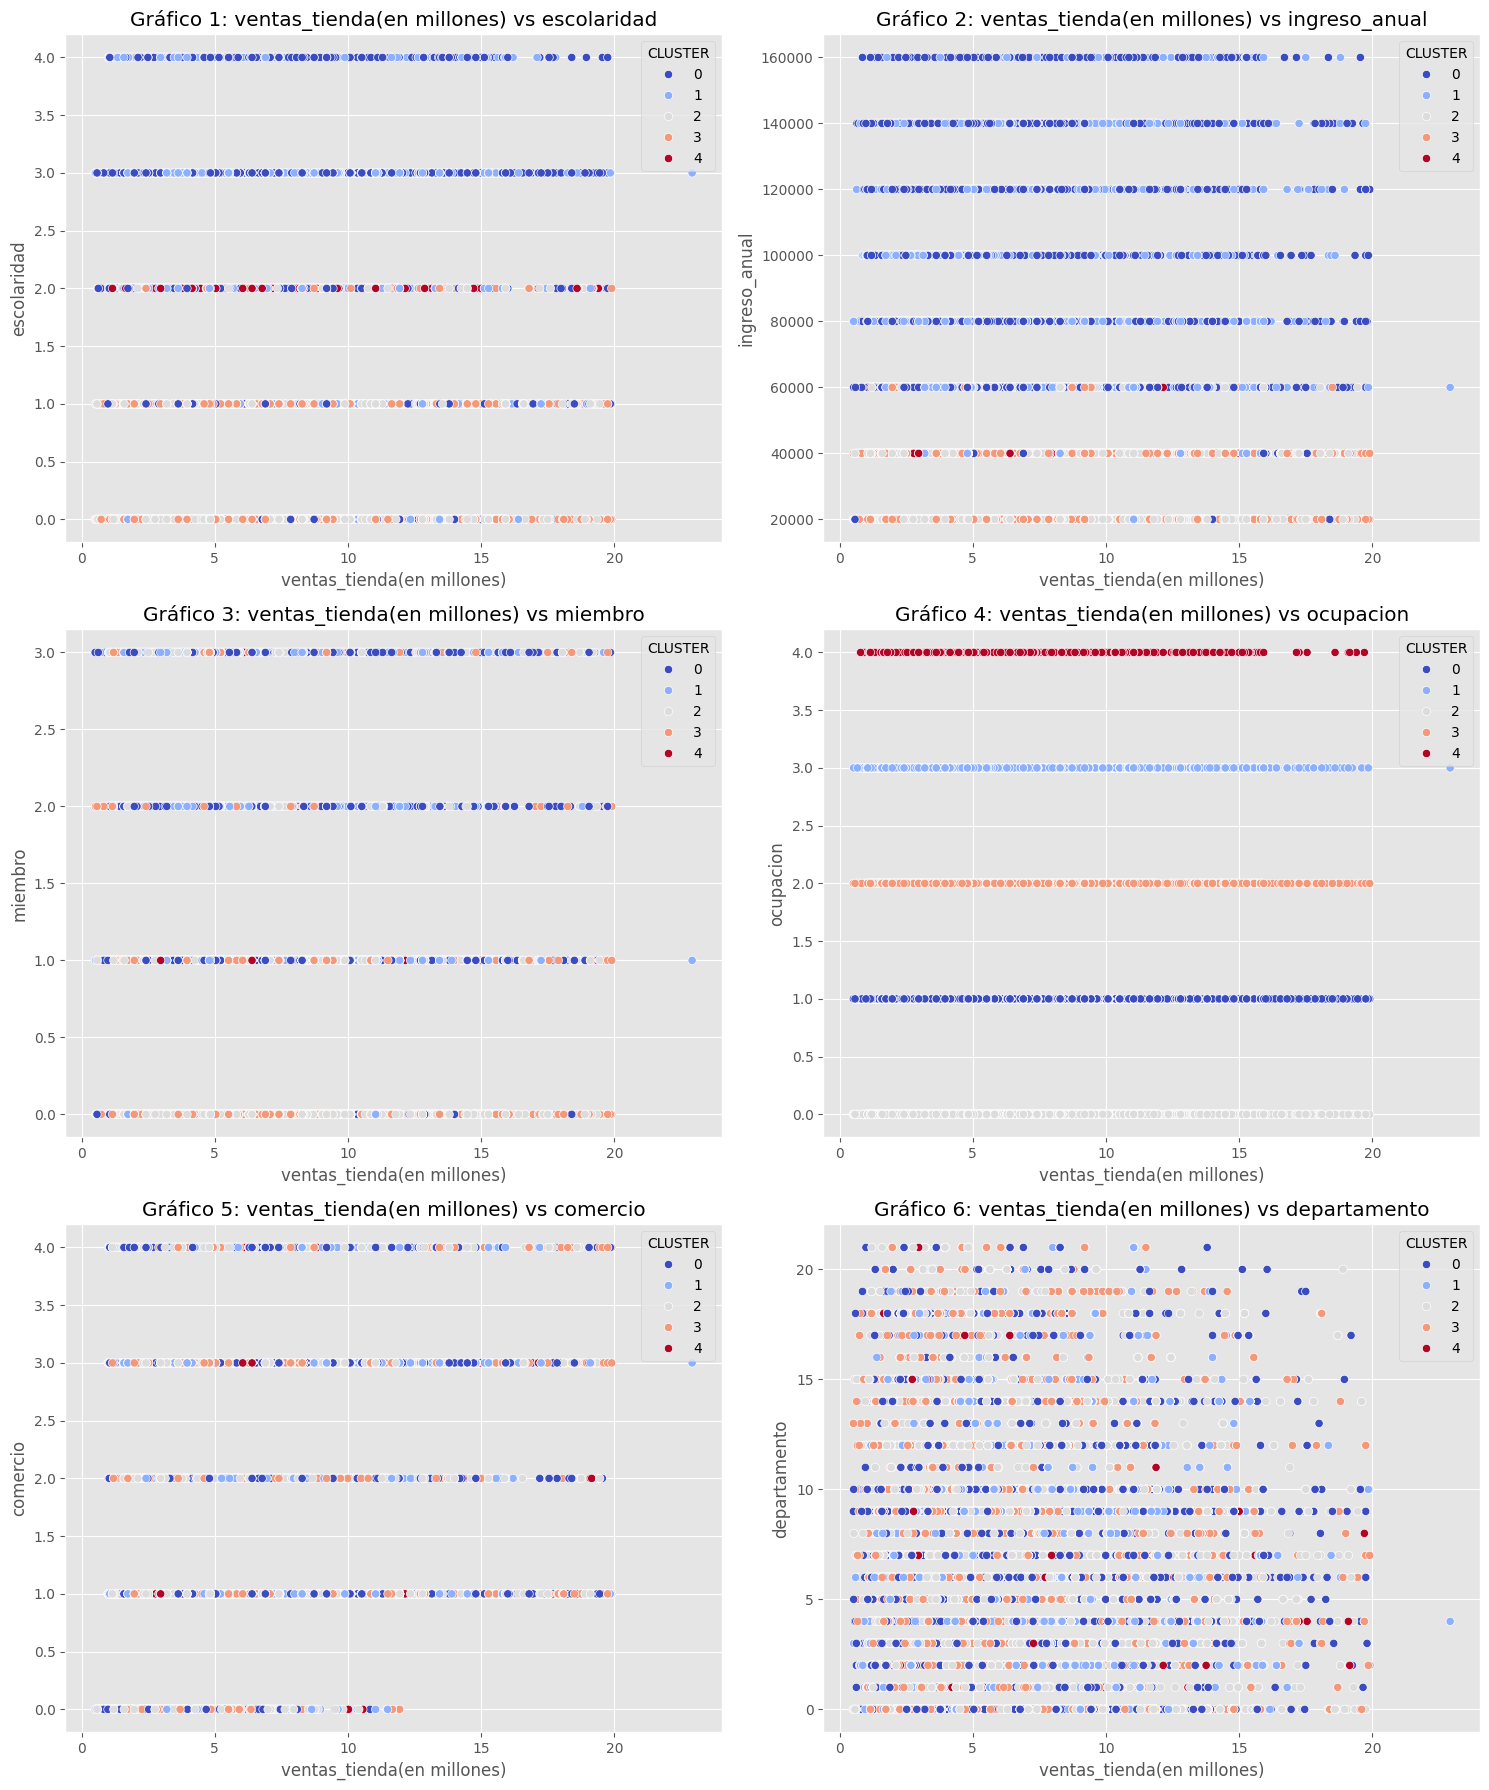

In [28]:
def plot_scatter_with_clusters(df, x, y_dicc, hue):

    total_plots = len(y_dicc)
    rows = (total_plots + 1) // 2
    cols = 2

    # Creamos el lienzo de gráficos
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6 * rows))

    # Contador para numerar los gráficos
    count = 1

    # Iteramos sobre cada par x-y y generamos el gráfico correspondiente
    for (x_name, y_variable), ax in zip(y_dicc.items(), axes.flatten()):
        sns.scatterplot(data=df, x=x, y=df[y_variable], hue=hue, palette='coolwarm', ax=ax)
        ax.set_xlabel(x)
        ax.set_ylabel(y_variable)
        ax.set_title(f'Gráfico {count}: {x} vs {y_variable}')
        count += 1

    plt.tight_layout()
    plt.show()

variables_dict = {
    'Variable_1': 'escolaridad',
    'Variable_2': 'ingreso_anual',
    'Variable_3': 'miembro',
    'Variable_4': 'ocupacion',
    'Variable_5': 'comercio',
    'Variable_6': 'departamento',

}

plot_scatter_with_clusters(datos_final, 'ventas_tienda(en millones)', variables_dict, 'CLUSTER')

##5.5 Visualización y análisis de los clusters

NOTA. Se creo una función que nos permitiría graficar inicialmente los atributos del df que se utilizó para la clusterización. Utilizamos como base de cada grafico (eje x) el atributo ‘ventas_tienda(en_millones).

**Gráfico 1** Ventas vs Escolaridad: Los clusters 0 y 1 se agrupan en una mayor escolaridad mientras que los cluster =<3 en una escolaridad inferior. Recordar que la codificación de este atributo fue de menor a mayo según el nivel de escolaridad:
'escolaridad':{ 'Primaria':0, 'Secundaria':1,   'Técnico':2,   'Superior':3 , 'Maestría':4}
No hay una tendencia visible que nos indique que los clusters se agrupen en ciertos valores de la variable ventas.

**Gráfico 2** Ventas vs Ingreso Anual: Aquí se ve marcada una gran diferencia en la agrupación de los clusters 0-1 para los clientes con un salario >= 60K. Esto ya nos da un indicativo del perfil de nuestros clusters.

**Gráfico 3** Ventas vs miembro: No es posible realizar una clara diferencia en la agrupación de los clusters según el nivel de membresía aunque pareciera ligeramente que los clusters 0-1 tiene mayor presencia en los clientes de membresía ‘Plata’ y ‘Oro’.

**Gráfico 4**. Ventas vs Ocupación. Evidentemente nuestro modelo de clusterización ha tomado al atributo ‘ocupación’ como base para llevar acabo la clusterización, valga la redundancia. Recordar que, aunque en el gráfico se muestra la codificación de este atributo, en el df utilizado para la clusterización se utilizó la función get_dummies(). Al final el número de clusters se ha igualado con el número de ocupaciones. La clasificación/clusterización fue la siguiente:

Ocupación - Cluster

Profesional - 0

Gestión - 1

Técnico - 2

Obrero - 3

Cargo de oficina - 4



# <font color = orange> 6. Descripción de los clusters

Los clientes del cluster 0 son clientes con una elevada escolaridad (Superior y Maestría), un ingreso >= 60K anules y ocupan cargos como profesionales en sus empresas.

Los clientes de cluster 1 son clientes con una elevada escolaridad (Superior y Maestría), un ingreso >= 60K anules y ocupan cargos de gestión en sus empresas.

Los clientes de cluster 2 son clientes con una preparación media - Técnica o inferior, con un ingreso <= 60K anules y ocupan cargos como técnicos en sus empresas

Los clientes de cluster 3 son clientes con una preparación media - Técnica o inferior, con un ingreso <= 60K anules y ocupan cargos como obreros en sus empresas

Los clientes de cluster 4 son clientes con una preparación media - Técnica o inferior, con un ingreso < 60K anules y ocupan cargos como oficinistas en sus empresas





<font color = orange> Conclusión y estrategias a implementar

Se realizó la clusterización de los clientes de Universal Food con la finalidad de encontrar tendencias de consumo para diseñar una estrategia de marketing que nos ayude a aumentar las ventas de la compañia.

A apartir de la selección de atributos que nos permitirian implementar el modelo de clusterización para agrupar a los clientes de la mejor forma y de acuerdo a los resultados obtenidos, los clusters de clientes se alineron de acuerdo a la ocupación de los clientes.

Existe una relación directa entre la ocupación del cliente, su nivel de ingreso y su escolaridad, algo que es completamente previsible aúnque el modelo no mostró alguna tendecia observable hasta ahora y que nos permitiera identificar habitos de consumo.

La propuesta en este punto aplicar un analisis semejante al 'Sesgo de supervivencia' e identificar los productos que pueden llegar a un nivel superior en su número de ventas de acuerdo al departamento al que pertencen y de acuerdo a la ocupación del cliente y su nivel de ingresos.

De esta forma podriamos dirigir una campaña a los productos rankeados del 6-10 por 'ventas_tienda(en millones)' según el tipo de cliente y su nivel de ingresos anuales.

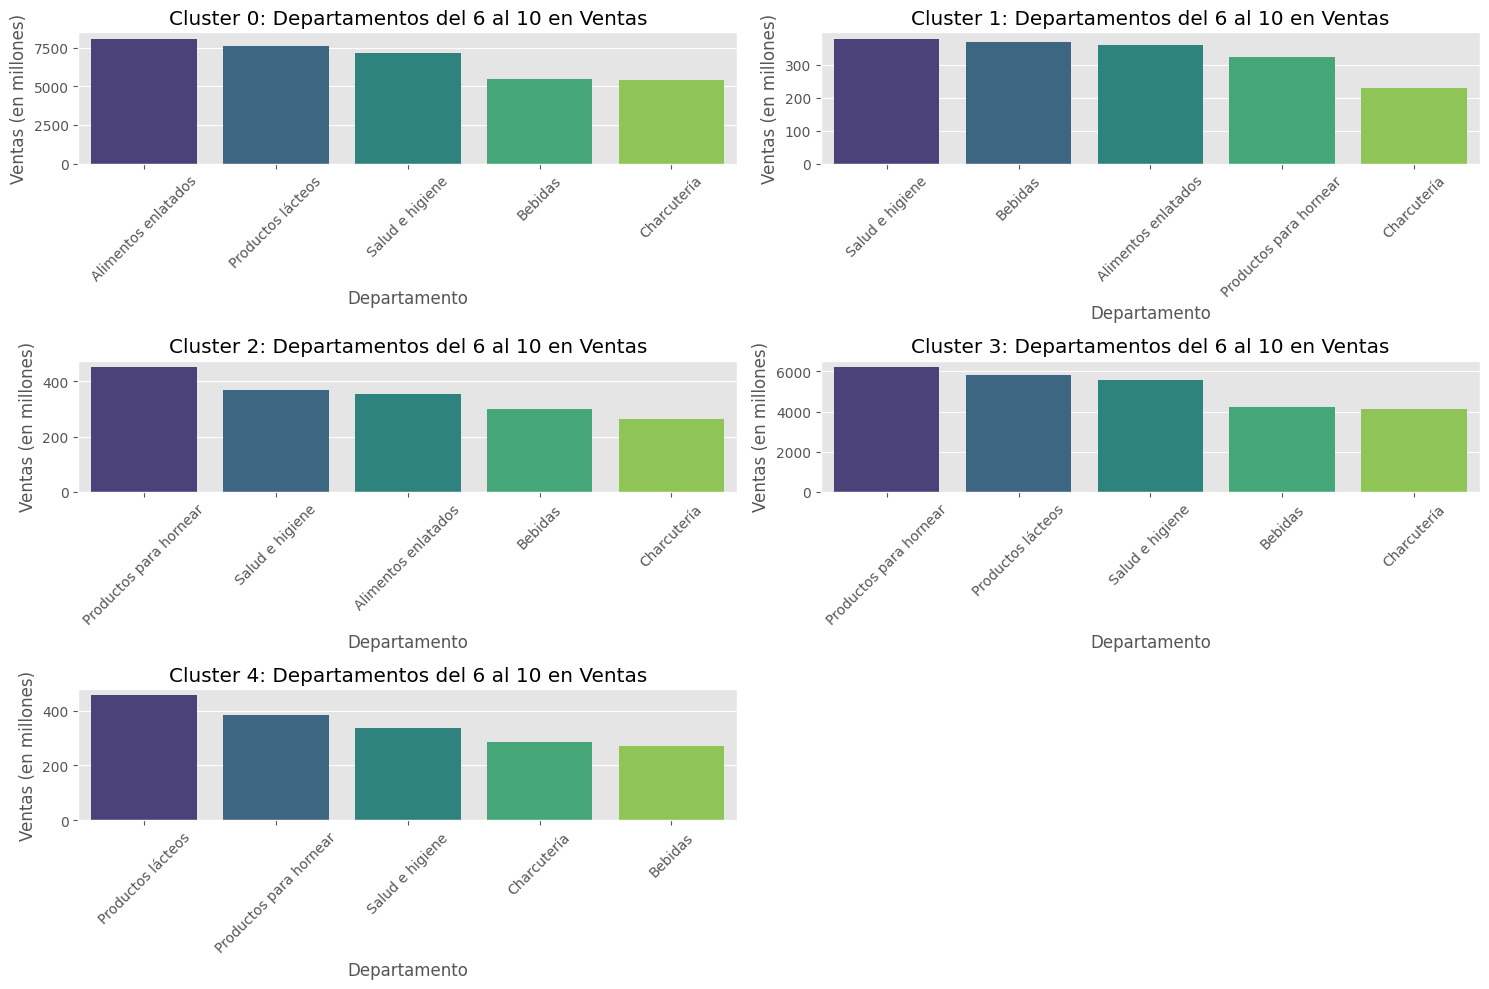

In [50]:
# Creamos un df por cada cluster (ocupación) y de acuardo a su nivel de ingreso anual

datos_profesional = datos[(datos['ocupacion'] == "Profesional") & (datos['ingreso_anual'] >= 60000)]
datos_tecnico = datos[(datos['ocupacion'] == "Técnico") & (datos['ingreso_anual'] >= 60000)]
datos_gestion = datos[(datos['ocupacion'] == "Gestión") & (datos['ingreso_anual'] < 60000)]
datos_obrero = datos[(datos['ocupacion'] == "Obrero") & (datos['ingreso_anual'] < 60000)]
datos_cargo_de_oficina = datos[(datos['ocupacion'] == "Cargo de Oficina") & (datos['ingreso_anual'] < 60000)]

clusters = {
    'Cluster 0': datos_profesional,
    'Cluster 1': datos_gestion,
    'Cluster 2': datos_tecnico,
    'Cluster 3': datos_obrero,
    'Cluster 4': datos_cargo_de_oficina
}

def plot_departments_6_to_10_per_cluster(clusters_dict):

    # Calculamos el número total de subgráficos necesarios
    num_clusters = len(clusters_dict)
    num_rows = (num_clusters + 1) // 2  # Aseguramos que haya suficientes filas para todos los clusters
    num_cols = 2

    # Creamos un lienzo para los gráficos
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    # Aplanamos el arreglo de ejes si es necesario
    axes = axes.flatten()

    # Iteramos sobre cada cluster y generamos el gráfico correspondiente
    for i, (cluster, df) in enumerate(clusters_dict.items()):
        # Sumamos las ventas por departamento
        department_sales = df.groupby("departamento")[["ventas_tienda(en millones)"]].sum()

        # Ordenamos los departamentos por ventas en orden descendente
        sorted_departments = department_sales.sort_values(by='ventas_tienda(en millones)', ascending=False).reset_index()

        # Tomamos los departamentos del lugar 6 al 10
        departments_6_to_10 = sorted_departments.iloc[5:10]

        # Generamos el gráfico de barras en el subgráfico correspondiente
        sns.barplot(data=departments_6_to_10, x='departamento', y='ventas_tienda(en millones)', hue='departamento', palette='viridis', ax=axes[i])
        axes[i].set_title(f'{cluster}: Departamentos del 6 al 10 en Ventas')
        axes[i].set_xlabel('Departamento')
        axes[i].set_ylabel('Ventas (en millones)')
        axes[i].tick_params(axis='x', rotation=45)

    # Eliminamos los subgráficos vacíos si es necesario
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Llamamos a la función con el diccionario de clusters
plot_departments_6_to_10_per_cluster(clusters)